In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

from data_prep import y_train, y_test, tf_idf_data_train, tf_idf_data_test
from visualizations import confusion_matrix_heat_map

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
parameters = {'C':  [30],
              'penalty': ['l2'],
              'solver': ['saga'],
              'multi_class': ['auto']}

In [3]:
log = LogisticRegression(random_state=0, max_iter=1000)
log_classifier = GridSearchCV(log, parameters, cv=3, n_jobs= -1)
log_classifier.fit(tf_idf_data_train, y_train)
print(log_classifier.best_estimator_)

LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [4]:
log_train_preds = log_classifier.predict(tf_idf_data_train)
log_test_preds = log_classifier.predict(tf_idf_data_test)

log_train_score = accuracy_score(y_train, log_train_preds)
log_test_score = accuracy_score(y_test, log_test_preds)

log_cv_score = cross_val_score(log_classifier, tf_idf_data_train, y_train, cv=3, scoring="accuracy")

In [5]:
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(log_train_score, log_test_score))
print("CV Scores:", log_cv_score)

Training Accuracy: 0.9863 		 Testing Accuracy: 0.6195
CV Scores: [0.71251493 0.71729391 0.8245221 ]


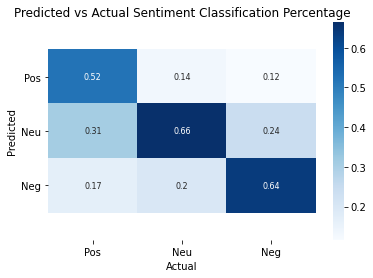

In [6]:
confusion_matrix_heat_map(log_classifier, tf_idf_data_test, y_test)